In [1]:
#import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
# import dataset
os.chdir('E:\Capstone\Bank Churn Prediction')
bankdata = pd.read_csv('data.csv')


In [3]:
bankdata.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
bankdata.shape

(10000, 14)

In [5]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bankdata.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
bankdata.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### so there is no missing values are present in the data set so we can further proceed with the eda


In [8]:
dup= bankdata.duplicated() #Checking duplicates values
print('Duplicate values :',dup.sum())

Duplicate values : 0


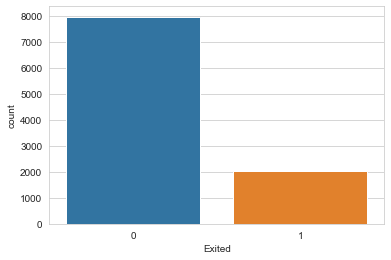

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',data=bankdata)

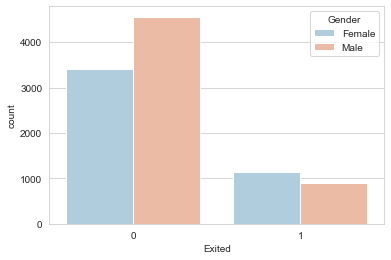

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=bankdata,palette='RdBu_r')

more females left the bank in comparison to males so by seeing this we can say that this bank is more bias to the male customer

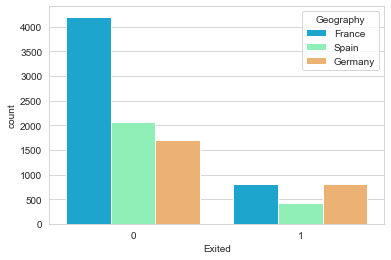

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Geography',data=bankdata,palette='rainbow')


france have the maximum number of customer who doesnot exited the bank and by seeing this visualization we can say that spain has the least number of customer who leave the bank


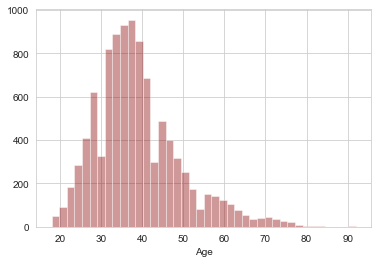

In [12]:
sns.distplot(bankdata['Age'],kde=False,color='darkred',bins=40)

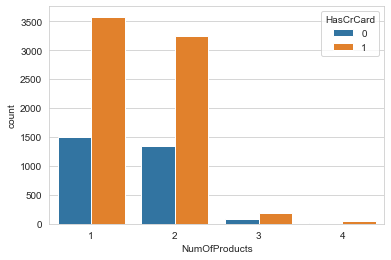

In [13]:
sns.countplot(x='NumOfProducts',hue="HasCrCard",data=bankdata)

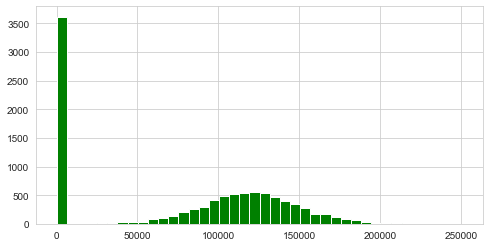

In [14]:
bankdata['Balance'].hist(color='green',bins=40,figsize=(8,4))

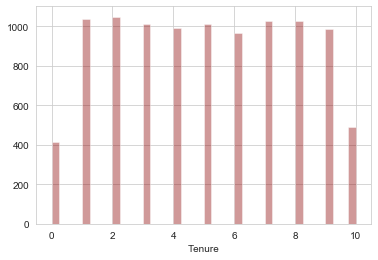

In [15]:
sns.distplot(bankdata['Tenure'],kde=False,color='darkred',bins=40)

1000 and more customers are with the bank for 1year to 9 year so we can say that most of the 
customers leave the bank after 9 year or we can say that most customer leaves the bank after 9 years


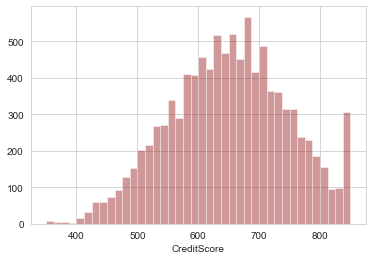

In [16]:
sns.distplot(bankdata['CreditScore'],kde=False,color='darkred',bins=40)

most of the customers having credit score between 600 to 700 so we can say that the cusomers who having credit score more then 600 are active customers of the bank


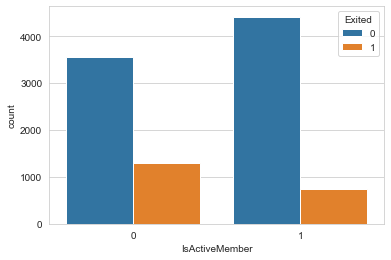

In [17]:
sns.countplot(x='IsActiveMember',hue="Exited",data=bankdata)

## Converting Categorical Features

In [18]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
pd.get_dummies(bankdata['Geography'],drop_first=True).head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [20]:
gender= pd.get_dummies(bankdata['Gender'],drop_first=True)
geography = pd.get_dummies(bankdata['Geography'],drop_first=True)

In [21]:
bankdata.drop(['Gender','Geography','Surname','CustomerId','RowNumber'],axis=1,inplace=True)

In [22]:
bankdata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [23]:
bankdata = pd.concat([bankdata,gender,geography],axis=1)

In [24]:
bankdata.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
bankdata[num_vars] = scaler.fit_transform(bankdata[num_vars])

## train Test Split

In [26]:
bankdata.drop('Exited',axis=1).head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,0,1
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,0,1


In [27]:
bankdata['Exited'].head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(bankdata.drop('Exited',axis=1), 
                                                    bankdata['Exited'], test_size=0.30, 
                                                    random_state=101)

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
accuracy=confusion_matrix(y_test,predictions)

In [35]:
accuracy

array([[2304,   74],
       [ 504,  118]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8073333333333333

In [38]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.61      0.19      0.29       622

    accuracy                           0.81      3000
   macro avg       0.72      0.58      0.59      3000
weighted avg       0.78      0.81      0.76      3000



## RandomForest Classification

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)
rf_model.fit(X_train, y_train)

y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)
print(y_train_pred)
print(y_test_pred)

[0 0 1 ... 0 0 0]
[0 0 0 ... 0 1 0]


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)
print("Classification Report for random: \n", classification_report(y_test, y_test_pred))

[[2310   68]
 [ 325  297]]
Classification Report for random: 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2378
           1       0.81      0.48      0.60       622

    accuracy                           0.87      3000
   macro avg       0.85      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [44]:
import xgboost as xgb
from xgboost import XGBClassifier
XGBoost_CLF = xgb.XGBClassifier(max_depth=6, learning_rate=0.05, n_estimators=400, 
                                objective="binary:hinge", booster='gbtree', 
                                n_jobs=-1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, 
                                subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
                                base_score=0.5, random_state=42)

XGBoost_CLF.fit(X_train,y_train)

y_pred = XGBoost_CLF.predict(X_test)

print("Classification Report for XGBoost: \n", classification_report(y_test, y_pred))


C:\Users\Asus\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report for XGBoost: 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      2378
           1       0.70      0.57      0.63       622

    accuracy                           0.86      3000
   macro avg       0.80      0.75      0.77      3000
weighted avg       0.85      0.86      0.86      3000

